In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/content/match_information.csv')
df.head()

,hometeamname,awayteamname,dateandtimecet,matchid,roundname,matchday,session,matchminute,injurytime,numberofphases,phase,scorehome,scoreaway,matchstatus,stadiumid,refereewebname,assistantrefereewebname,humidity,temperature,windspeed
0,Turkey,Italy,2021-06-11T21:00:00,2024447,final tournament,1,1,90,4,2,2,0,3,Played,57775,Makkelie,Steegstra,63,24,9
1,Wales,Switzerland,2021-06-12T15:00:00,2024448,final tournament,1,2,90,6,2,2,1,1,Played,250002745,Turpin,Danos,45,29,23
2,Denmark,Finland,2021-06-12T18:00:00,2024449,final tournament,1,2,90,5,2,2,0,1,Played,63462,Taylor,Beswick,48,17,32
3,Belgium,Russia,2021-06-12T21:00:00,2024450,final tournament,1,2,90,2,2,2,3,0,Played,250003363,Mateu Lahoz,Cebrián Devís,23,19,8
4,England,Croatia,2021-06-13T15:00:00,2024451,final tournament,1,3,90,5,2,2,1,0,Played,1100043,Orsato,Giallatini,46,27,11


In [15]:
df.columns

Index(['hometeamname', 'awayteamname', 'dateandtimecet', 'matchid',
       'roundname', 'matchday', 'session', 'matchminute', 'injurytime',
       'numberofphases', 'phase', 'scorehome', 'scoreaway', 'matchstatus',
       'stadiumid', 'refereewebname', 'assistantrefereewebname', 'humidity',
       'temperature', 'windspeed'],
      dtype='object')

In [16]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hometeamname             51 non-null     object
 1   awayteamname             51 non-null     object
 2   dateandtimecet           51 non-null     object
 3   matchid                  51 non-null     int64 
 4   roundname                51 non-null     object
 5   matchday                 51 non-null     int64 
 6   session                  51 non-null     int64 
 7   matchminute              51 non-null     int64 
 8   injurytime               51 non-null     int64 
 9   numberofphases           51 non-null     int64 
 10  phase                    51 non-null     int64 
 11  scorehome                51 non-null     int64 
 12  scoreaway                51 non-null     int64 
 13  matchstatus              51 non-null     object
 14  stadiumid                51 non-null     int

In [17]:
# Handle missing values
# For simplicity, let's fill numeric columns with the mean and categorical columns with the mode
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Convert date and time to datetime format
df['dateandtimecet'] = pd.to_datetime(df['dateandtimecet'])

# Remove duplicates
df = df.drop_duplicates()

# Display the updated info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   hometeamname             51 non-null     object        
 1   awayteamname             51 non-null     object        
 2   dateandtimecet           51 non-null     datetime64[ns]
 3   matchid                  51 non-null     int64         
 4   roundname                51 non-null     object        
 5   matchday                 51 non-null     int64         
 6   session                  51 non-null     int64         
 7   matchminute              51 non-null     int64         
 8   injurytime               51 non-null     int64         
 9   numberofphases           51 non-null     int64         
 10  phase                    51 non-null     int64         
 11  scorehome                51 non-null     int64         
 12  scoreaway                51 non-null  

In [18]:
# Extracting date and time features
df['year'] = df['dateandtimecet'].dt.year
df['month'] = df['dateandtimecet'].dt.month
df['day'] = df['dateandtimecet'].dt.day
df['hour'] = df['dateandtimecet'].dt.hour
df['minute'] = df['dateandtimecet'].dt.minute

# Encoding categorical variables
df = pd.get_dummies(df, columns=['hometeamname', 'awayteamname', 'roundname', 'matchstatus', 'refereewebname', 'assistantrefereewebname'])

# Display the first few rows of the updated dataset
print(df.head())


       dateandtimecet  matchid  matchday  session  matchminute  injurytime  \
0 2021-06-11 21:00:00  2024447         1        1           90           4   
1 2021-06-12 15:00:00  2024448         1        2           90           6   
2 2021-06-12 18:00:00  2024449         1        2           90           5   
3 2021-06-12 21:00:00  2024450         1        2           90           2   
4 2021-06-13 15:00:00  2024451         1        3           90           5   

   numberofphases  phase  scorehome  scoreaway  ...  \
0               2      2          0          3  ...   
1               2      2          1          1  ...   
2               2      2          0          1  ...   
3               2      2          3          0  ...   
4               2      2          1          0  ...   

   assistantrefereewebname_Ghinguleac  assistantrefereewebname_Giallatini  \
0                               False                               False   
1                               False         

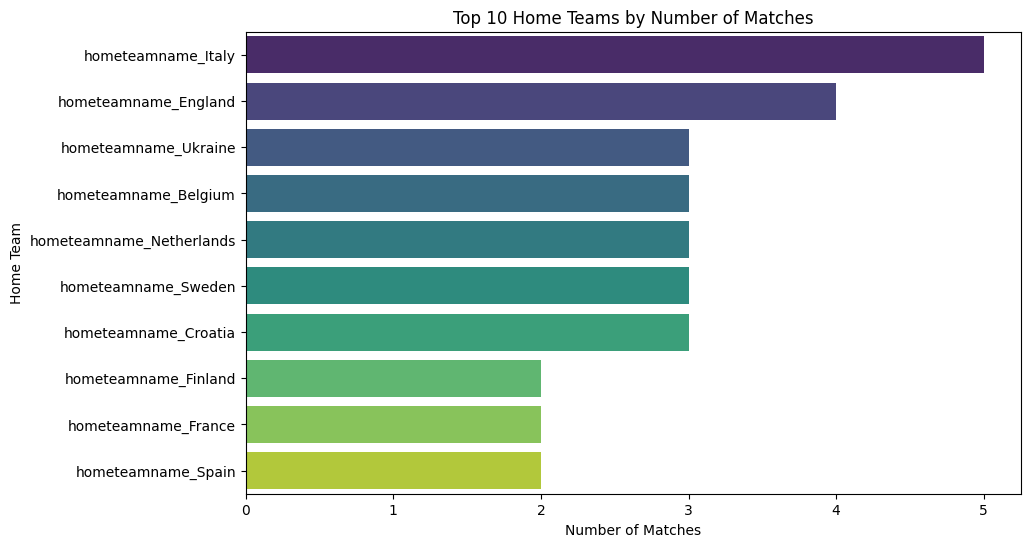

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find columns related to hometeamname after one-hot encoding
hometeam_columns = [col for col in df.columns if 'hometeamname' in col]

# Calculate total matches for each home team
home_team_counts = df[hometeam_columns].sum().sort_values(ascending=False).head(10)

# Basic visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=home_team_counts.index, x=home_team_counts.values, palette='viridis')
plt.title('Top 10 Home Teams by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Home Team')
plt.show()

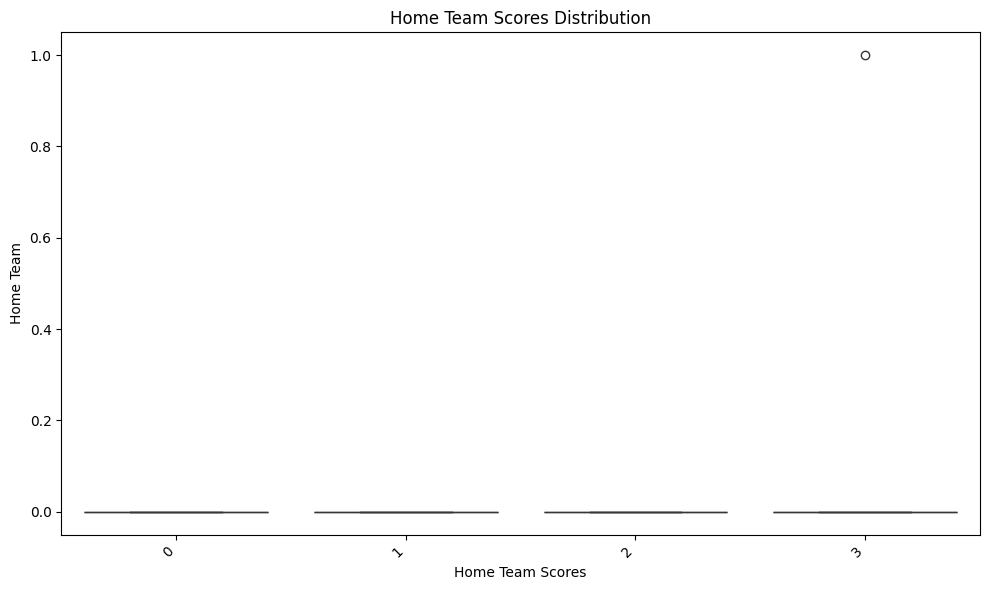

In [22]:
#Home Team Scores Distribution


plt.figure(figsize=(10, 6))

# Choose one of the one-hot encoded hometeam columns for the y-axis
# For example, let's use the column for the first team alphabetically
chosen_hometeam_column = [col for col in df.columns if 'hometeamname' in col][0]

sns.boxplot(x='scorehome', y=chosen_hometeam_column, data=df, palette='viridis')
plt.title('Home Team Scores Distribution')
plt.xlabel('Home Team Scores')
plt.ylabel('Home Team')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

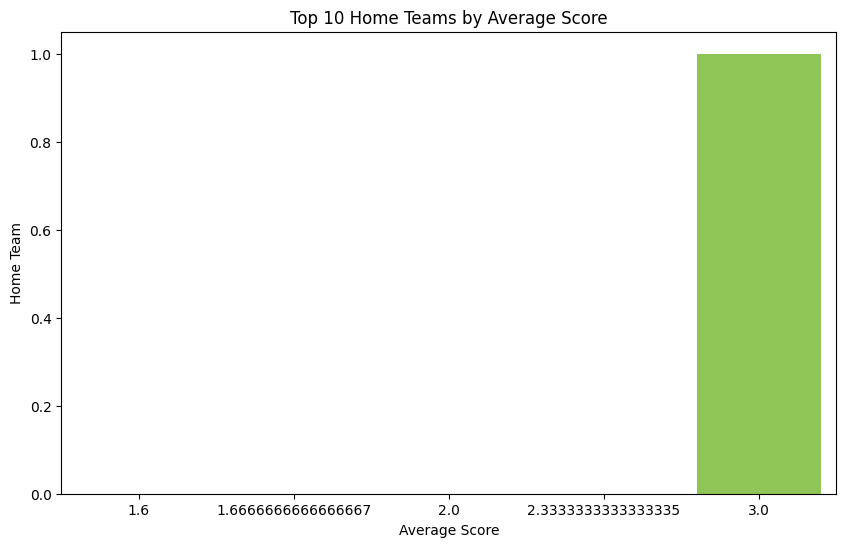

In [36]:
#Average Home Team Scores
# Group by the one-hot encoded columns related to hometeamname
home_team_scores = df.groupby([col for col in df.columns if 'hometeamname' in col])['scorehome'].mean().sort_values(ascending=False).head(10)

# Reset the index to convert the MultiIndex to columns
home_team_scores = home_team_scores.reset_index()

plt.figure(figsize=(10, 6))
# Access the home team names from the column created after resetting the index
sns.barplot(x=home_team_scores['scorehome'], y=home_team_scores.iloc[:, 0], palette='viridis')
plt.title('Top 10 Home Teams by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Home Team')
plt.show()

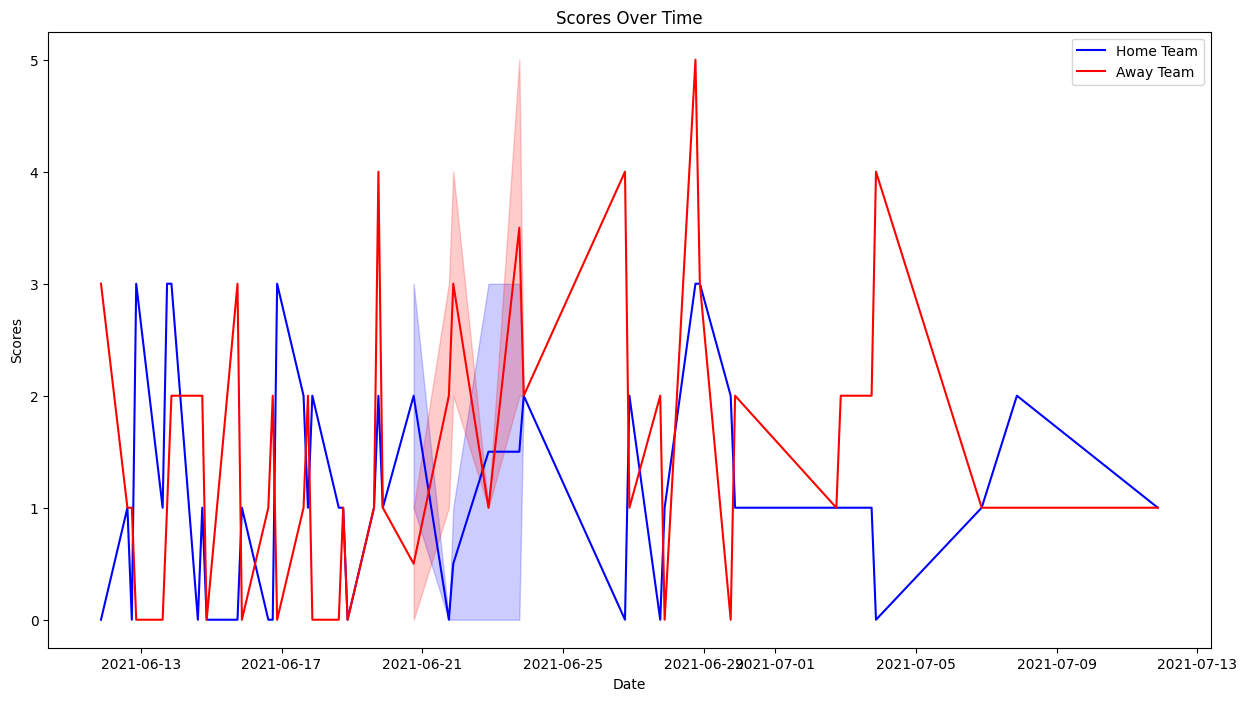

In [28]:
# Visualizing match outcomes over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='dateandtimecet', y='scorehome', data=df, label='Home Team', color='blue')
sns.lineplot(x='dateandtimecet', y='scoreaway', data=df, label='Away Team', color='red')
plt.title('Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Scores')
plt.legend()
plt.show()


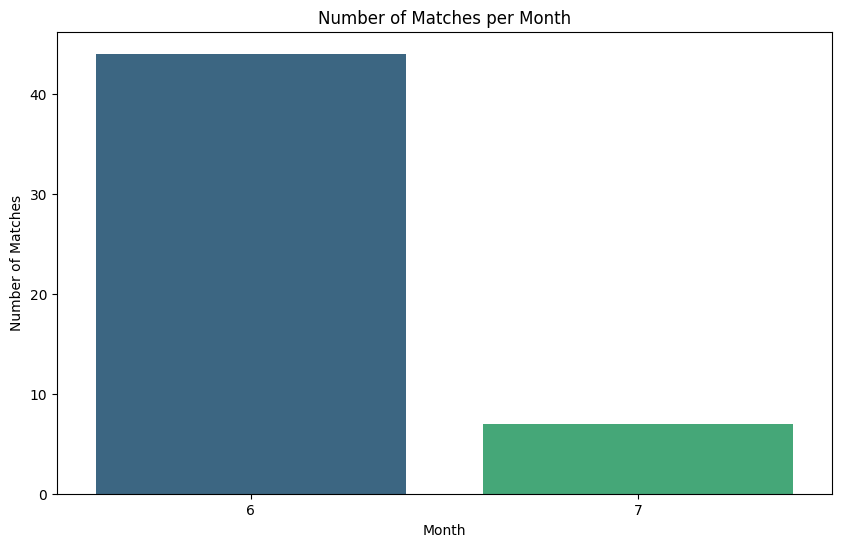

In [30]:
matches_per_month = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=matches_per_month.index, y=matches_per_month.values, palette='viridis')
plt.title('Number of Matches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.show()


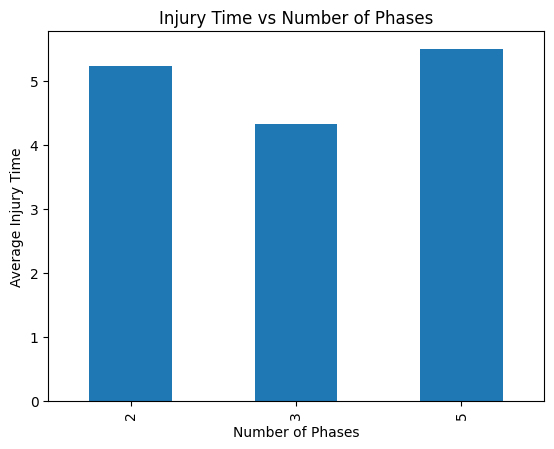

In [45]:

import matplotlib.pyplot as plt

avg_injury_time = df.groupby('numberofphases')['injurytime'].mean()

avg_injury_time.plot(kind='bar')
plt.xlabel('Number of Phases')
plt.ylabel('Average Injury Time')
_ = plt.title('Injury Time vs Number of Phases')

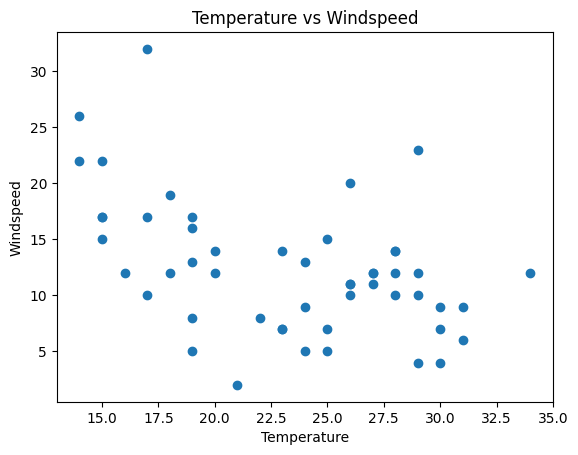

In [46]:

import matplotlib.pyplot as plt

plt.scatter(df['temperature'], df['windspeed'])
plt.xlabel('Temperature')
plt.ylabel('Windspeed')
_ = plt.title('Temperature vs Windspeed')

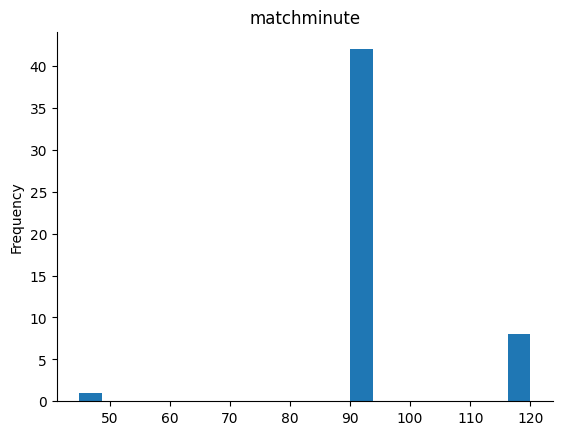

In [47]:
from matplotlib import pyplot as plt
df['matchminute'].plot(kind='hist', bins=20, title='matchminute')
plt.gca().spines[['top', 'right',]].set_visible(False)